[*********************100%%**********************]  1 of 1 completed


HDFCBANK Strategy Performance:
Total Profit: 131285.94
Cumulative Returns: 131.29%
Max Drawdown: 2704.12
Win Rate: 69.76%
Profit Factor: 5.70


[*********************100%%**********************]  1 of 1 completed



NIFTY 50 Performance:
NIFTY 50 Cumulative Returns: 55.02%
NIFTY 50 Max Drawdown: 22.71


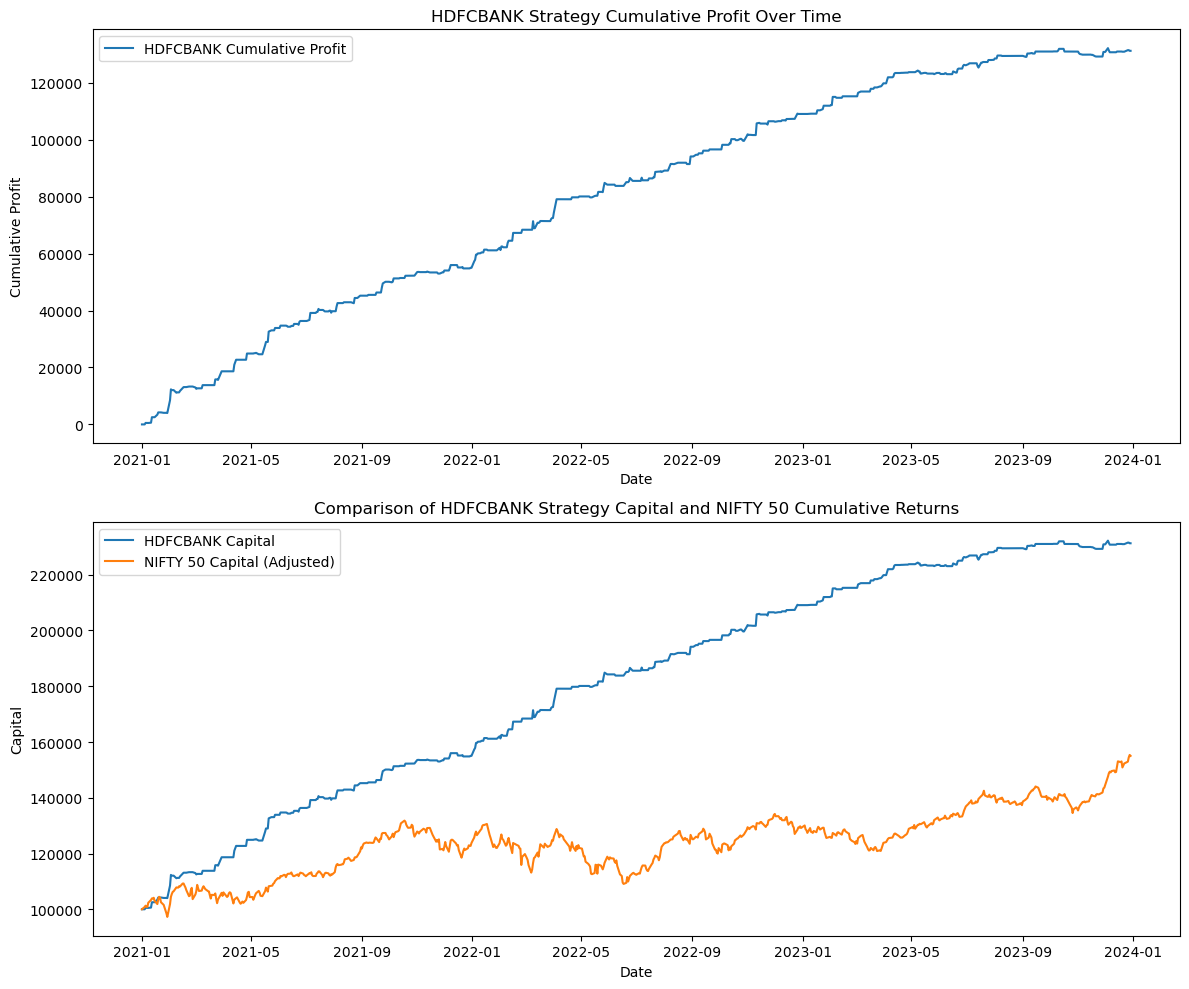

In [10]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


data_hdfc = yf.download('HDFCBANK.NS', start="2021-01-01", end="2023-12-31")


data_hdfc['buysignal'] = np.where((data_hdfc['Open'] > data_hdfc['Close'].shift(+1)) & (data_hdfc['Close'] > data_hdfc['Close'].shift(+1)), 1.0, 0.0)
data_hdfc['sellsignal'] = np.where((data_hdfc['Open'] < data_hdfc['Close'].shift(+1)) & (data_hdfc['Close'] < data_hdfc['Close'].shift(+1)), -1.0, 0.0)


initial_capital = 100000
data_hdfc['capital'] = initial_capital


data_hdfc['buyqty'] = np.where(data_hdfc['buysignal'] == 1, data_hdfc['capital'] / data_hdfc['Close'], 0.0)
data_hdfc['sellqty'] = np.where(data_hdfc['sellsignal'] == 1, data_hdfc['capital'] / data_hdfc['Close'], 0.0)


data_hdfc['buy_profit'] = np.where(data_hdfc['buysignal'] == 1, data_hdfc['buyqty'] * (data_hdfc['Close'] - data_hdfc['Open']), 0.0)
data_hdfc['sell_profit'] = np.where(data_hdfc['sellsignal'] == 1, data_hdfc['sellqty'] * (data_hdfc['Open'] - data_hdfc['Close']), 0.0)


data_hdfc['profit'] = data_hdfc['buy_profit'] + data_hdfc['sell_profit']
data_hdfc['cumulative_profit'] = data_hdfc['profit'].cumsum()


data_hdfc['capital'] = initial_capital + data_hdfc['cumulative_profit']


Totalprofit = data_hdfc['profit'].sum()
max_drawdown = (data_hdfc['capital'].cummax() - data_hdfc['capital']).max()
cumulative_returns = data_hdfc['cumulative_profit'].iloc[-1] / initial_capital * 100


winning_trades = data_hdfc['profit'][data_hdfc['profit'] > 0].count()
losing_trades = data_hdfc['profit'][data_hdfc['profit'] < 0].count()
total_trades = winning_trades + losing_trades
win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
profit_factor = data_hdfc['profit'][data_hdfc['profit'] > 0].sum() / -data_hdfc['profit'][data_hdfc['profit'] < 0].sum() if -data_hdfc['profit'][data_hdfc['profit'] < 0].sum() > 0 else 0


print("HDFCBANK Strategy Performance:")
print(f'Total Profit: {Totalprofit:.2f}')
print(f'Cumulative Returns: {cumulative_returns:.2f}%')
print(f'Max Drawdown: {max_drawdown:.2f}')
print(f'Win Rate: {win_rate:.2f}%')
print(f'Profit Factor: {profit_factor:.2f}')


nifty_data = yf.download('^NSEI', start="2021-01-01", end="2023-12-31")


nifty_data['Cumulative Returns'] = (nifty_data['Close'] / nifty_data['Close'].iloc[0]) * 100


nifty_max_drawdown = (nifty_data['Cumulative Returns'].cummax() - nifty_data['Cumulative Returns']).max()


print("\nNIFTY 50 Performance:")
print(f'NIFTY 50 Cumulative Returns: {nifty_data["Cumulative Returns"].iloc[-1] - 100:.2f}%')
print(f'NIFTY 50 Max Drawdown: {nifty_max_drawdown:.2f}')


fig, ax = plt.subplots(2, 1, figsize=(12, 10))


ax[0].plot(data_hdfc.index, data_hdfc['cumulative_profit'], label='HDFCBANK Cumulative Profit')
ax[0].set_title('HDFCBANK Strategy Cumulative Profit Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Cumulative Profit')
ax[0].legend()


ax[1].plot(data_hdfc.index, data_hdfc['capital'], label='HDFCBANK Capital')
ax[1].plot(nifty_data.index, initial_capital * (nifty_data['Cumulative Returns'] / 100), label='NIFTY 50 Capital (Adjusted)')
ax[1].set_title('Comparison of HDFCBANK Strategy Capital and NIFTY 50 Cumulative Returns')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Capital')
ax[1].legend()

plt.tight_layout()
plt.show()
